In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('data/ec2_cpu_utilization_with_anomaly.csv')

# Метки перечислены в репозитории NAB для каждого набора данных
# anomalies_timestamp = [
#         "2014-02-26 22:05:00",
#         "2014-02-27 17:15:00"
# ]

# Убедитесь, что столбец метки времени является фактической меткой времени
df['timestamp'] = pd.to_datetime(df['timestamp'])

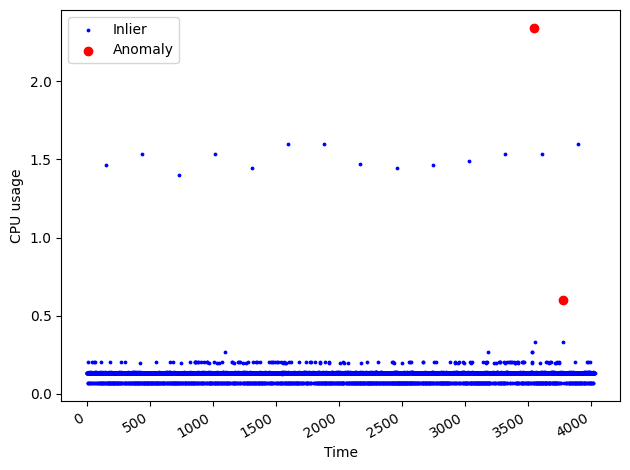

In [3]:
# визуализируем данные
anomaly_df = df.loc[df['is_anomaly'] == -1]
inlier_df = df.loc[df['is_anomaly'] == 1]

fig, ax = plt.subplots()

ax.scatter(inlier_df.index, inlier_df['value'], color='blue', s=3, label='Inlier')
ax.scatter(anomaly_df.index, anomaly_df['value'], color='red', label='Anomaly')

ax.set_xlabel('Time')
ax.set_ylabel('CPU usage')
ax.legend(loc=2)

fig.autofmt_xdate()
plt.tight_layout()

### Local outlier factor

Фактор локального выброса (LOF) работает путем сравнения локальной плотности точки с локальными плотностями ее соседей. Если плотности точки и ее соседей одинаковы, то точка является inlier. Однако если плотность точки намного меньше плотности ее соседей, то она должна быть выбросом, потому что более низкая плотность означает, что точка более изолирована. <br/>
Нужно установить количество соседей для просмотра, и параметр scikit-learn по умолчанию равен 20, что хорошо работает в большинстве случаев.<br/>
Как только количество соседей установлено, мы вычисляем расстояние досягаемости. <br/>

Метод обучения без учителя, который сравнивает локальную плотность точки с плотностью ее соседей. По сути, если плотность точки мала по сравнению с ее соседями, это означает, что это изолированная точка и, вероятно, выброс.

In [4]:
train = df[:3550]
test = df[3550:]

In [5]:
from sklearn.neighbors import LocalOutlierFactor
# уровень загрязнения данных
contamination = 1/len(train)
lof = LocalOutlierFactor(contamination=contamination, novelty=True)
X_train = train['value'].values.reshape(-1,1)
lof.fit(X_train)

LocalOutlierFactor(contamination=0.00028169014084507044, novelty=True)

In [6]:
preds_lof = lof.predict(test['value'].values.reshape(-1,1))


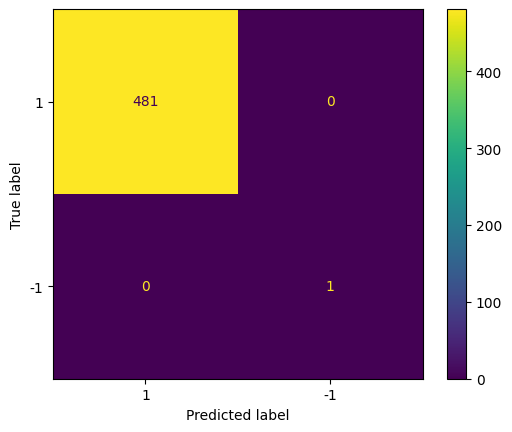

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test['is_anomaly'], preds_lof, labels=[1, -1])

disp_cm = ConfusionMatrixDisplay(cm, display_labels=[1, -1])

disp_cm.plot();

Метод LOF смог отметить единственный выброс в тестовом наборе и правильно пометил каждую другую точку как нормальную точку.